<a href="https://colab.research.google.com/github/JoelSilva2002/-Calculo_de_Metricas_de_Avaliacao_-de_Aprendizado./blob/main/calculoMetricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=6,
          validation_data=(test_images, test_labels),
          callbacks=[tensorboard_callback])

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.8973 - loss: 0.3244 - val_accuracy: 0.9804 - val_loss: 0.0622
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy: 0.9850 - val_loss: 0.0464
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9899 - val_loss: 0.0320
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9925 - val_loss: 0.0262
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9900 - val_loss: 0.0321
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9949 - loss: 0.0149 - val_accuracy: 0.9911 - val_loss: 0.0308


In [14]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [15]:
classes = [0,1,2,3,4,5,6,7,8,9]

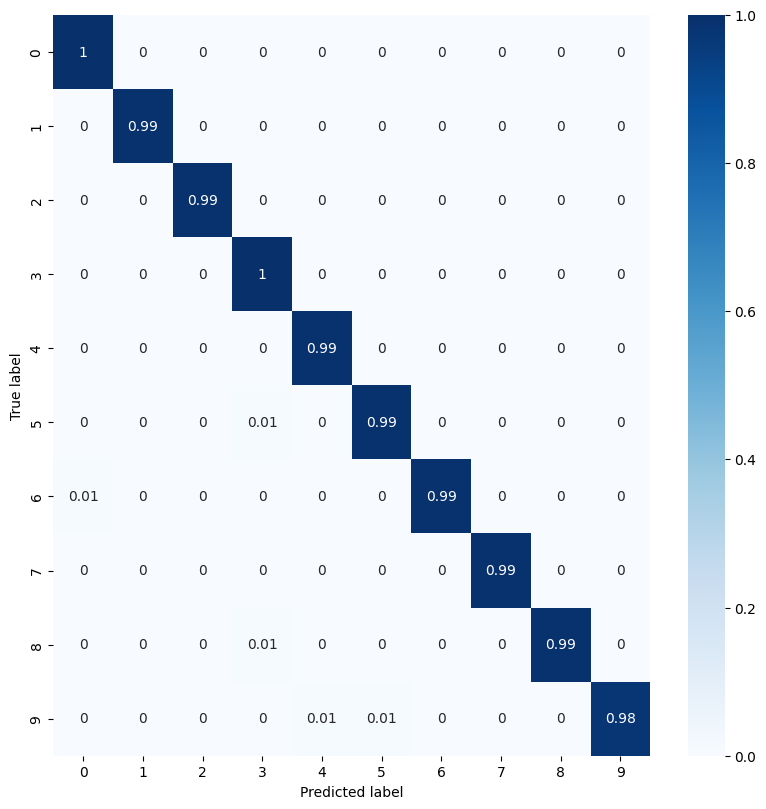

In [16]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
# Convertendo matriz de confusão em valores básicos
VP = np.diag(con_mat)  # Verdadeiros positivos (diagonal)
FP = np.sum(con_mat, axis=0) - VP  # Falsos positivos
FN = np.sum(con_mat, axis=1) - VP  # Falsos negativos
VN = np.sum(con_mat) - (FP + FN + VP)  # Verdadeiros negativos

In [18]:
# Calculando as métricas para cada classe
sensibilidade = VP / (VP + FN)   # Recall
especificidade = VN / (VN + FP)
acuracia = np.sum(VP) / np.sum(con_mat)
precisao = VP / (VP + FP)
fscore = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

In [19]:
# Exibindo como tabela
metricas_df = pd.DataFrame({
    'Classe': classes,
    'Sensibilidade (Recall)': np.round(sensibilidade, 3),
    'Especificidade': np.round(especificidade, 3),
    'Precisão': np.round(precisao, 3),
    'F1-Score': np.round(fscore, 3)
})

print("\n=== MÉTRICAS POR CLASSE ===")
print(metricas_df)

print(f"\nAcurácia geral: {acuracia:.3f}")


=== MÉTRICAS POR CLASSE ===
   Classe  Sensibilidade (Recall)  Especificidade  Precisão  F1-Score
0       0                   0.998           0.999     0.989     0.993
1       1                   0.993           0.999     0.996     0.994
2       2                   0.993           0.999     0.994     0.994
3       3                   0.995           0.998     0.980     0.988
4       4                   0.995           0.999     0.992     0.993
5       5                   0.985           0.999     0.988     0.987
6       6                   0.987           1.000     0.998     0.993
7       7                   0.989           0.999     0.992     0.991
8       8                   0.991           0.999     0.991     0.991
9       9                   0.983           0.999     0.991     0.987

Acurácia geral: 0.991
